# Social Advertisement Prediction

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [45]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 36.9 KB


In [47]:
data = data.drop("User ID", axis=1)

We dont need the "User ID"

## EDA

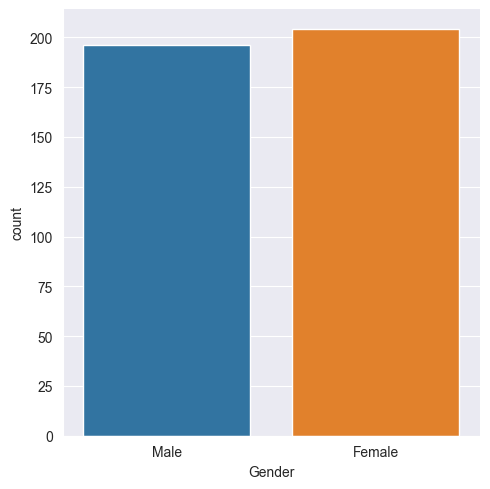

In [48]:
sns.catplot(data=data, x="Gender", kind="count")

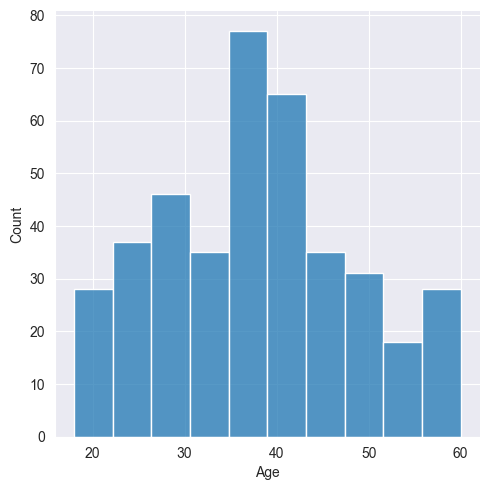

In [49]:
sns.displot(data=data, x="Age")

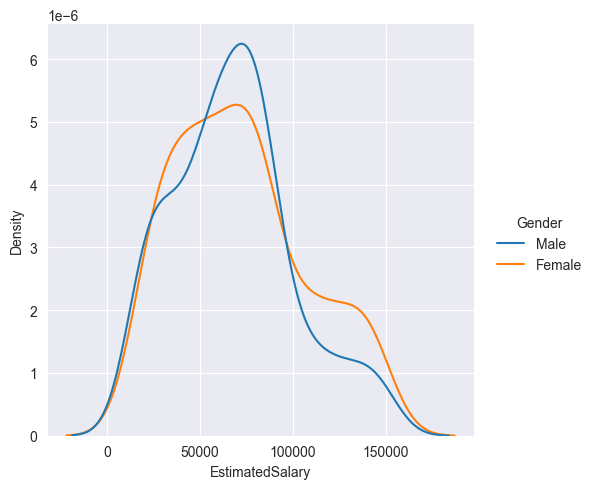

In [50]:
sns.displot(data=data, x="EstimatedSalary", hue="Gender", kind="kde")

<AxesSubplot:xlabel='Purchased', ylabel='count'>

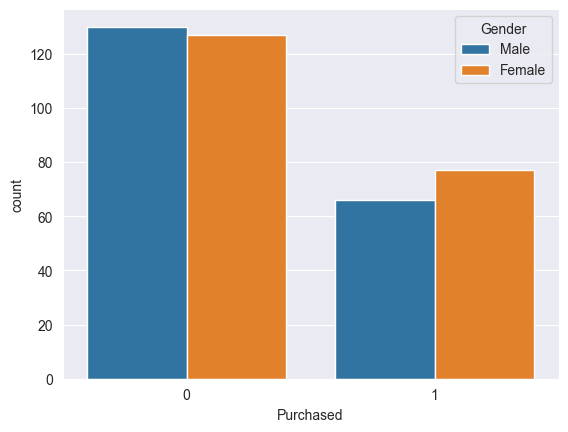

In [51]:
sns.countplot(data=data, x="Purchased", hue="Gender")

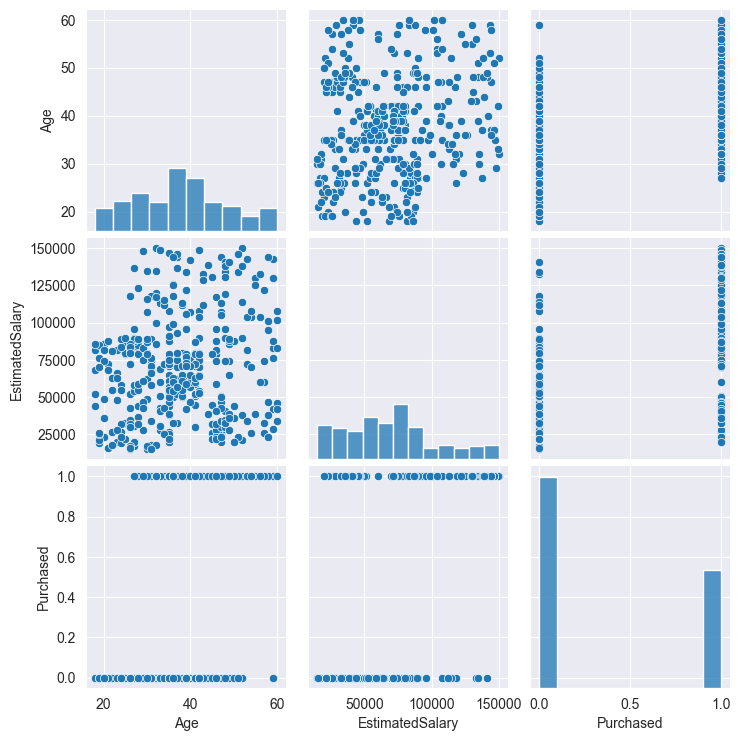

In [52]:
sns.pairplot(data=data)

We can definitely see Age and Salary dont correlate

## Preprocessing

In [53]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [54]:
enc.fit(data.iloc[:, 0].values)

LabelEncoder()

In [55]:
data["Gender"] = enc.transform(data.iloc[:, 0].values)

### Create X and Y

In [56]:
data.head()  # 1 for Male 0 for Female

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [57]:
x = data.iloc[:, :3].values
y = data.iloc[:, 3].values

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [61]:
scaler.fit(x)

StandardScaler()

In [62]:
scaled_x = scaler.transform(x)

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

## Model Creation

In [58]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()

Also import all necessary libraries

In [65]:
regression.fit(x_train, y_train)

LogisticRegression()

In [82]:
y_pred_train = regression.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

Lets test the accuracy on Train Set

In [67]:
regression.score(x_train, y_train)

0.815625

Lets test the accuracy on Test Set

In [68]:
regression.score(x_test, y_test)

0.8875

In [70]:
from sklearn.metrics import confusion_matrix


### Train

In [83]:
cm = confusion_matrix(y_pred_train, y_train)
cm

array([[189,  43],
       [ 16,  72]], dtype=int64)

In [84]:
(cm[0, 0] + cm[1, 1]) / cm.sum()

0.815625

See both the confusion matrix score and .score has same value

### Test

In [85]:
y_pred_test = regression.predict(x_test)
y_pred_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [86]:
cm = confusion_matrix(y_pred_test, y_test)
cm

array([[50,  7],
       [ 2, 21]], dtype=int64)

In [87]:
(cm[0, 0] + cm[1, 1]) / cm.sum()

0.8875

For test data set we have more accuracy

## Cross Validation

In [88]:
from sklearn.model_selection import KFold, cross_val_score

In [89]:
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

In [91]:
score = cross_val_score(regression, x_train, y_train, cv=kfold, scoring="accuracy")
score

array([0.8  , 0.825, 0.825, 0.875, 0.85 , 0.8  , 0.8  , 0.8  ])

In [92]:
print(np.mean(score))

0.821875


Through KFold Cross Validation we have reached 82% accuracy